## KNN 최근접이웃 알고리즘 

- iris data set 이용 데이터 적재

In [2]:
from sklearn.datasets import load_iris
from sklearn.neighbors import KNeighborsRegressor
import pandas as pd

C:\Users\SMT002\anaconda3\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


In [3]:
iris_dataset = load_iris() #array형태 데이터

In [10]:
iris_dataset

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

In [7]:
iris_dataset['data'] 

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

In [11]:
iris_dataset['target']

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [6]:
iris_dataset['target_names']

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [16]:
data = pd.DataFrame(iris_dataset['data'], columns=data_cols)

In [15]:
data_cols = ['sepal_length','sepal_width','petal_length','petal_width' ]

In [19]:
data['species'] = iris_dataset['target']

In [20]:
data.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


### train/test set 분리

In [18]:
from sklearn.model_selection import train_test_split

In [21]:
X_train, X_test, y_train, y_test = train_test_split(iris_dataset['data'], 
                                                    iris_dataset['target'], 
                                                    test_size = 0.3 , 
                                                    random_state = 0)

In [23]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(105, 4)
(105,)
(45, 4)
(45,)


### 데이터 분석해보기

In [24]:
import matplotlib.pyplot as plt

In [26]:
iris_dataframe = pd.DataFrame(X_train, columns = iris_dataset.feature_names)

In [28]:
iris_dataframe.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.0,2.0,3.5,1.0
1,6.5,3.0,5.5,1.8
2,6.7,3.3,5.7,2.5
3,6.0,2.2,5.0,1.5
4,6.7,2.5,5.8,1.8


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000254CD0C0688>,
      dtype=object)

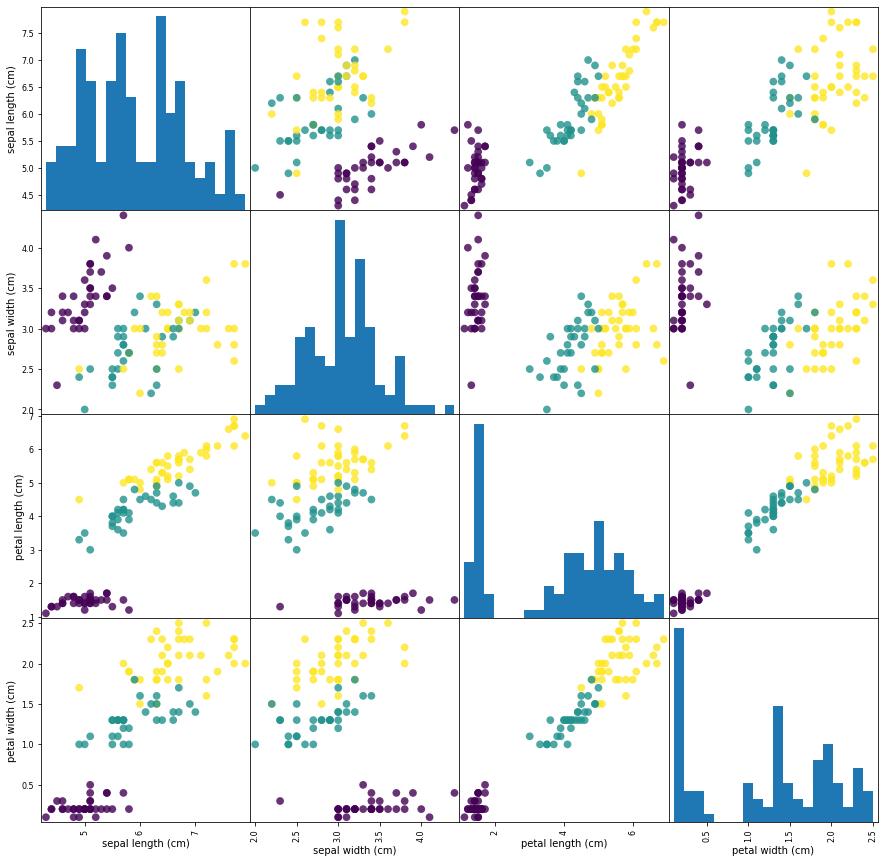

In [29]:
pd.plotting.scatter_matrix( iris_dataframe, c = y_train ,         
                          figsize = (15,15), marker = 'o',          
                          hist_kwds = {'bins' : 20},
                           alpha = 0.8,
                           s = 60
                           #  c : 색상구분 - y`_train 기준 색상 구분, hist_kwds : 히스토그램 설정, bins 히스토그램 두께
                           # alpha : 투명도(0에가까울수록 투명), s : 점 사이즈
                          )

## KNN 분류알고리즘

In [30]:
from sklearn.neighbors import KNeighborsClassifier

In [31]:
model = KNeighborsClassifier(n_neighbors=1)

### 학습수행

In [32]:
model.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=1, p=2,
                     weights='uniform')

In [33]:
model.score(X_test, y_test)

0.9777777777777777

In [35]:
import numpy as np

# 꽃받침 길이 5cm, 폭 2.9cm / 꽃잎 길이 1cm 폭 0.2cm인 붓꽃의 품종 예측
new_data = np.array([[5,2.9,1,0.2]])
model.predict([[5,2.9,1,0.2]])

array([0])

In [37]:
new_prediction = model.predict(new_data)

In [38]:
iris_dataset['target_names'][new_prediction]

array(['setosa'], dtype='<U10')

In [39]:
model.score(X_train,y_train)

1.0

### 임의의 특성 2개를 이용하여 평가하기

In [40]:
X_train, X_test, y_train, y_test = train_test_split( iris_dataset['data'][:,:2], iris_dataset['target'], 
                                                   random_state = 0) ##일부 특성만

In [41]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(112, 2)
(112,)
(38, 2)
(38,)


In [42]:
model2 = KNeighborsClassifier(n_neighbors=1)
model2.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=1, p=2,
                     weights='uniform')

In [43]:
model2.score(X_train, y_train)

0.9375

In [45]:
# 꽃받침의 길이가 10cm , 폭이 2.9cm인 붓꽃의 품종은?
new_pred = np.array([[10,2.9]])

pred = model2.predict(new_pred)
iris_dataset['target_names'][pred]

array(['virginica'], dtype='<U10')

In [46]:
y_pred = model2.predict(X_test)
y_pred #예측 결과값 출력

array([1, 2, 0, 2, 0, 1, 0, 1, 2, 1, 2, 2, 1, 2, 1, 0, 2, 1, 0, 0, 1, 1,
       0, 0, 2, 0, 0, 2, 1, 0, 2, 1, 0, 1, 2, 1, 0, 2])

In [47]:
model2.score(X_test, y_test)

0.7105263157894737

## hyperparameter tuning

In [48]:
from sklearn import metrics

In [49]:
test_list = []
train_list = []

for k in range( 1 , 105 , 2) :
    mod = KNeighborsClassifier(n_neighbors = k)
    mod.fit(X_train, y_train)
    
    test_pre = mod.predict(X_test)
    test_score = metrics.accuracy_score(test_pre,y_test)
    test_list.append(test_score)
    
    train_pre = mod.predict(X_train)
    train_score = metrics.accuracy_score(train_pre,y_train)
    train_list.append(train_score)

### Visualization

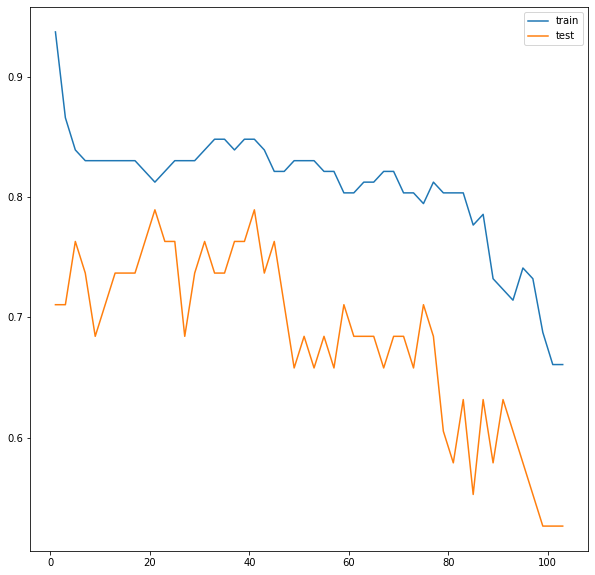

In [51]:
plt.figure(figsize = (10,10))
plt.plot( range ( 1, 105, 2) , train_list , label = 'train')
plt.plot( range ( 1, 105, 2) , test_list , label = 'test')
plt.legend()
plt.show()

In [52]:
!pip install mglearn

  Created wheel for mglearn: filename=mglearn-0.1.9-py2.py3-none-any.whl size=582645 sha256=464ff0b4ccb1be86725f333bbd4c85510bd5bf0a55560b1afef6b248a18f98ef
  Stored in directory: c:\users\smt002\appdata\local\pip\cache\wheels\f1\17\e1\1720d6dcd70187b6b6c3750cb3508798f2b1d57c9d3214b08b
Successfully built mglearn


In [53]:
import mglearn

C:\Users\SMT002\anaconda3\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


### 결정 경계 그래프

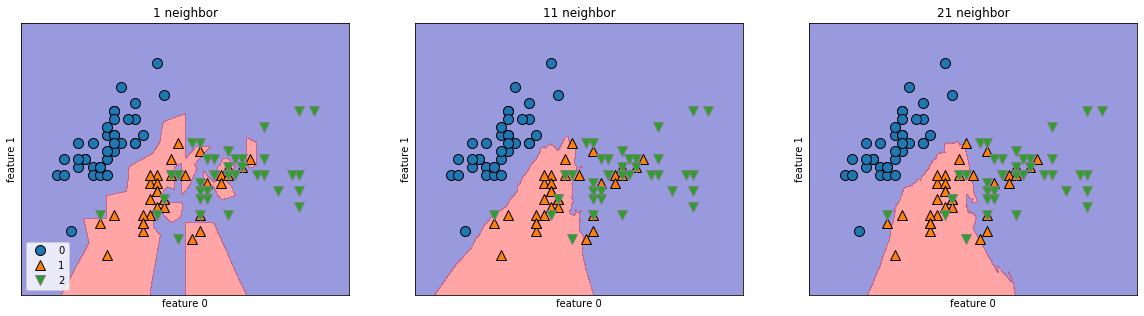

In [57]:
fig, axes = plt.subplots( 1, 3, figsize = ( 20, 5 ))

for n_neighbors , ax in zip([1,11,21] , axes ) :
    clf = KNeighborsClassifier(n_neighbors= n_neighbors).fit(X_train, y_train)
    mglearn.plots.plot_2d_separator( clf, X_train, fill = True, eps = 0.5 , ax = ax, alpha = 0.4)
    mglearn.discrete_scatter( X_train[:, 0], X_train[:,1], y_train, ax = ax)
    ax.set_title("{} neighbor".format(n_neighbors))
    ax.set_xlabel("feature 0")
    ax.set_ylabel("feature 1")
axes[0].legend(loc = 3)

## 이웃 수가 많아질수록 경계선이 부드러워진다 ! : 부드러운 경계 = 단순한 모델(복잡도 낮음)
## 이웃 수가 많아짐 --> 복잡도 낮은 모델

## 유방암 dataset

In [58]:
from sklearn.datasets import load_breast_cancer

In [59]:
cancer = load_breast_cancer()

In [60]:
cancer.keys()

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])

In [66]:
cancer.feature_names

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23')

In [65]:
for n, v in zip(cancer.target_names , np.bincount(cancer.target)) :
    print({n:v})

{'malignant': 212}
{'benign': 357}


- malignant : 악성
- benign : 양성

In [101]:
X_train, X_test ,y_train, y_test = train_test_split( cancer.data,
                                                   cancer.target,
                                                    random_state = 0
                                               )

In [102]:
test_list2 = []
train_list2 = []

for k in range( 1 , 11) :
    model = KNeighborsClassifier(n_neighbors = k)
    model.fit(X_train, y_train)  
    
    test_score = model.score(X_test, y_test)
    test_list2.append(test_score)
    
    train_score = model.score(X_train, y_train)
    train_list2.append(train_score)

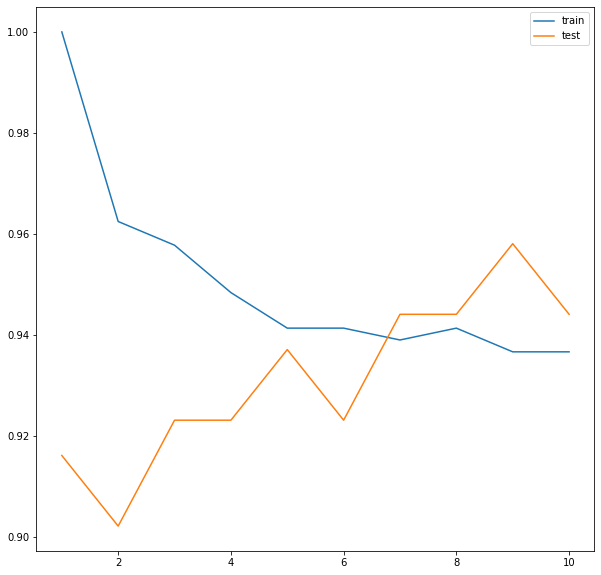

In [103]:
plt.figure(figsize = (10,10))
plt.plot( range ( 1, 11) , train_list2 , label = 'train')
plt.plot( range ( 1, 11) , test_list2 , label = 'test')
plt.legend()
plt.show()

## KNeighborsRegressor : 최근접 회귀 알고리즘

- 인접한 이웃 n개의 평균

In [104]:
test_list = []
train_list = []

for k in range( 1 , 11) :
    model = KNeighborsRegressor(n_neighbors = k)
    model.fit(X_train, y_train)  
    
    test_score = model.score(X_test, y_test)
    test_list.append(test_score)
    
    train_score = model.score(X_train, y_train)
    train_list.append(train_score)

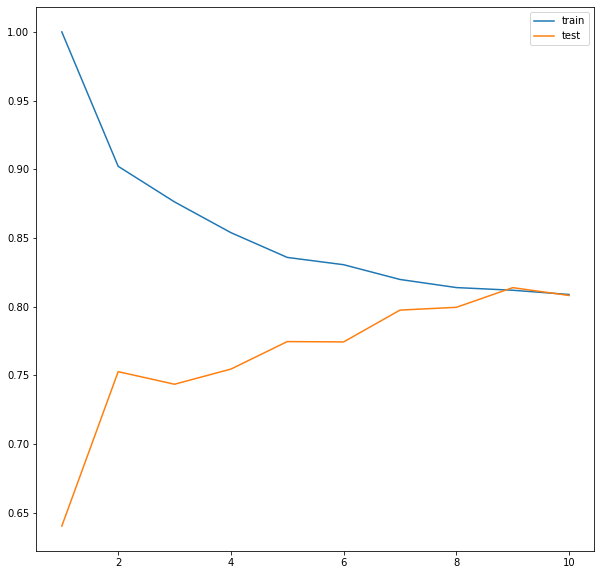

In [105]:
plt.figure(figsize = (10,10))
plt.plot( range ( 1, 11) , train_list , label = 'train')
plt.plot( range ( 1, 11) , test_list , label = 'test')
plt.legend()
plt.show()